![alt text](https://gdurl.com/5Dap/download)



###Índice de Contenidos

1. Carga de información y librerías 
2. Análisis previo de la información
>*   2.1 Estadística Descriptiva
>*   2.2 Modelo de Regresión Lineal Múltiple
>*   2.3 Red Neuronal
>*   2.4 Resumen Preprocesamiento
3. Proceamiento de la información
>*   3.1 Data Fill
>*   3.2 Estacionalidad
>*   3.3 Escalado
>*   3.4 Estacionaridad
>*   3.5 Resumen Procesamiento
4. Modelado
>*   4.1 Regresión Lineal Multiple
>*   4.2 Red Neuronal
>*   4.3 Resumen
5. Conclusiones

---
## 1. Carga de la Información y Librerías
---

In [1]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import statsmodels.api as sm
import keras
import math

from pylab import rcParams
from keras.models import Sequential 
from keras.layers import Dense 
from yellowbrick.regressor import ResidualsPlot
from sklearn import linear_model
from scipy.stats import pearsonr
from google.colab import files
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use('dark_background')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
uploaded = files.upload()

Saving PruebaEMBIv4.csv to PruebaEMBIv4.csv


In [3]:
print (uploaded['PruebaEMBIv4.csv'][:200].decode('utf-8') + '...')

Fecha,EMBI,WTI,PAM PX_OPEN PET,PAM PX_LAST,PAM YLD_CNV_LAST,2022 PX_OPEN,2022 PX_LAST,2022 YLD_CNV_LAST,2023 PX_OPEN,2023 PX_LAST,2023 YLD_CNV_LAST,2024 PX_OPEN,2024 PX_LAST,2024 YLD_CNV_LAST,2025(3) ...


In [4]:
data = pd.read_csv(io.StringIO(uploaded['PruebaEMBIv4.csv'].decode('utf-8')),parse_dates=["Fecha"])
#data.set_index('Fecha', inplace=False)
data.head(10)

,Fecha,EMBI,WTI,PAM PX_OPEN PET,PAM PX_LAST,PAM YLD_CNV_LAST,2022 PX_OPEN,2022 PX_LAST,2022 YLD_CNV_LAST,2023 PX_OPEN,2023 PX_LAST,2023 YLD_CNV_LAST,2024 PX_OPEN,2024 PX_LAST,2024 YLD_CNV_LAST,2025(3) PX_OPEN,2025(3) PX_LAST,2025(3) YLD_CNV_LAST,2026 PX_OPEN,2026 PX_LAST,2026 YLD_CNV_LAST,2027(1) PX_OPEN,2027(1) PX_LAST,2027(1) YLD_CNV_LAST,2027(2) PX_OPEN,2027(2) PX_LAST,2027(2) YLD_CNV_LAST,2028 PX_OPEN,2028 PX_LAST,2028 YLD_CNV_LAST,2029 PX_OPEN,2029 PX_LAST,2029 YLD_CNV_LAST,2030(2) PX_OPEN,2030(2) PX_LAST,2030(2) YLD_CNV_LAST
0,2019-09-26,668.0,56.69,99.631,98.997,5.559,109.150,109.401,6.553,106.450,106.500,7.559,102.392,102.553,7.833,100.417,100.555,7.728,105.558,105.698,9.079,104.425,104.698,9.311,100.050,100.268,9.492,95.108,95.321,8.665,108.783,109.100,9.261,101.383,101.625,9.236
1,2019-09-27,676.0,56.51,99.095,99.071,5.488,109.417,109.115,6.680,106.675,106.405,7.595,102.717,102.400,7.878,100.617,100.275,7.796,105.858,105.445,9.132,104.758,104.365,9.377,100.333,99.820,9.580,95.300,95.020,8.718,109.208,108.585,9.339,101.750,101.063,9.324
2,2019-09-30,677.0,56.54,99.068,99.052,5.509,109.167,109.142,6.677,106.583,106.383,7.608,102.508,102.317,7.905,100.417,100.010,7.861,105.617,105.408,9.144,104.517,104.425,9.370,99.875,100.029,9.546,95.008,95.167,8.692,108.763,108.492,9.353,101.183,101.510,9.261
3,2019-10-01,684.0,54.28,99.057,99.059,5.505,109.200,108.988,6.749,106.583,106.154,7.686,102.417,102.104,7.966,100.033,99.770,7.921,105.633,105.204,9.187,104.583,104.150,9.426,100.175,99.742,9.604,95.250,94.929,8.735,108.492,108.300,9.383,101.517,101.355,9.288
4,2019-10-02,682.0,54.00,99.057,99.051,5.515,109.075,109.267,6.641,106.292,106.475,7.594,102.067,102.438,7.885,99.850,100.183,7.832,105.350,105.600,9.117,104.258,104.458,9.374,99.875,100.196,9.525,94.900,95.538,8.627,108.225,108.958,9.281,101.317,102.058,9.187
5,2019-10-03,686.0,52.47,99.055,99.073,5.501,109.242,109.168,6.707,106.575,106.371,7.646,102.317,102.221,7.958,100.283,99.975,7.894,105.600,105.400,9.170,104.425,104.192,9.438,100.092,99.843,9.604,95.333,95.307,8.669,108.742,108.711,9.318,102.117,101.908,9.221
6,2019-10-04,684.0,52.29,99.080,99.086,5.489,109.117,109.597,6.537,106.492,106.670,7.560,102.200,102.620,7.861,99.900,100.253,7.835,105.492,105.620,9.133,104.292,104.610,9.366,99.892,100.347,9.516,95.308,95.800,8.582,108.658,109.353,9.220,101.658,102.529,9.132
7,2019-10-07,667.0,52.69,99.085,99.605,4.978,109.558,110.017,6.370,106.683,107.354,7.355,102.600,103.050,7.756,100.142,100.665,7.747,105.558,106.146,9.039,104.708,105.171,9.268,100.417,100.904,9.418,95.608,96.333,8.489,109.242,109.733,9.161,102.325,103.450,9.001
8,2019-10-08,777.0,52.81,99.756,99.295,5.286,110.033,103.870,9.027,107.392,101.193,9.336,103.050,96.961,9.385,100.575,94.528,9.196,106.208,99.537,10.342,105.175,98.758,10.496,100.933,95.006,10.550,96.367,90.843,9.483,109.717,102.423,10.325,103.475,97.176,9.960
9,2019-10-09,783.0,52.57,99.339,98.450,6.135,103.847,104.721,8.659,100.886,101.467,9.253,96.773,97.338,9.287,94.753,95.277,9.019,99.620,99.704,10.314,99.275,99.230,10.408,95.248,95.169,10.523,90.917,91.707,9.322,102.133,103.152,10.204,97.163,98.096,9.819


In [5]:
data2 = data.drop(['PAM PX_OPEN PET','PAM YLD_CNV_LAST','2022 PX_OPEN','2022 YLD_CNV_LAST','2023 PX_OPEN','2023 YLD_CNV_LAST','2024 PX_OPEN','2024 YLD_CNV_LAST','2025(3) PX_OPEN','2025(3) YLD_CNV_LAST','2026 PX_OPEN','2026 YLD_CNV_LAST','2027(1) PX_OPEN','2027(1) YLD_CNV_LAST','2027(2) PX_OPEN','2027(2) YLD_CNV_LAST','2028 PX_OPEN','2028 YLD_CNV_LAST','2029 PX_OPEN','2029 YLD_CNV_LAST','2030(2) PX_OPEN','2030(2) YLD_CNV_LAST'], axis=1)
data2 = data2.rename(columns={"PAM PX_LAST":"PAM","2022 PX_LAST":"2022","2023 PX_LAST":"2023","2024 PX_LAST":"2024","2025(3) PX_LAST":"2025","2026 PX_LAST":"2026","2027(1) PX_LAST":"2027(1)","2027(2) PX_LAST":"2027(2)","2028 PX_LAST":"2028","2029 PX_LAST":"2029","2030(2) PX_LAST":"2030"})
data2['Fecha'] = pd.to_datetime(data2['Fecha'], format='%Y-%m')
y = data2.set_index('Fecha')

In [6]:
data2.head(15)

,Fecha,EMBI,WTI,PAM,2022,2023,2024,2025,2026,2027(1),2027(2),2028,2029,2030
0,2019-09-26,668.0,56.69,98.997,109.401,106.500,102.553,100.555,105.698,104.698,100.268,95.321,109.100,101.625
1,2019-09-27,676.0,56.51,99.071,109.115,106.405,102.400,100.275,105.445,104.365,99.820,95.020,108.585,101.063
2,2019-09-30,677.0,56.54,99.052,109.142,106.383,102.317,100.010,105.408,104.425,100.029,95.167,108.492,101.510
3,2019-10-01,684.0,54.28,99.059,108.988,106.154,102.104,99.770,105.204,104.150,99.742,94.929,108.300,101.355
4,2019-10-02,682.0,54.00,99.051,109.267,106.475,102.438,100.183,105.600,104.458,100.196,95.538,108.958,102.058
5,2019-10-03,686.0,52.47,99.073,109.168,106.371,102.221,99.975,105.400,104.192,99.843,95.307,108.711,101.908
6,2019-10-04,684.0,52.29,99.086,109.597,106.670,102.620,100.253,105.620,104.610,100.347,95.800,109.353,102.529
7,2019-10-07,667.0,52.69,99.605,110.017,107.354,103.050,100.665,106.146,105.171,100.904,96.333,109.733,103.450
8,2019-10-08,777.0,52.81,99.295,103.870,101.193,96.961,94.528,99.537,98.758,95.006,90.843,102.423,97.176
9,2019-10-09,783.0,52.57,98.450,104.721,101.467,97.338,95.277,99.704,99.230,95.169,91.707,103.152,98.096


In [7]:
data2.isnull().sum().sum()

8

In [8]:
data3 = data2.fillna({
                     'EMBI': 0,
                     'WTI': 0,
                     'PAM': 0,
                     '2022': 0,
                     '2023': 0,
                     '2024': 0,
                     '2025': 0,
                     '2026': 0,
                     '2027(1)': 0,
                     '2027(2)': 0,
                     '2028': 0,
                     '2029': 0,
                     '2030': 0,
                        })

In [9]:
data3.isnull().sum().sum()

0

---
## 2. Análisis previo de la información
---

### 2.1 Estadística Descriptiva

In [10]:
data3.describe()

,EMBI,WTI,PAM,2022,2023,2024,2025,2026,2027(1),2027(2),2028,2029,2030
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,2055.935673,45.414152,84.337977,78.540304,75.174684,72.109117,69.750485,72.228567,71.711515,69.477667,67.381298,73.999673,71.007012
std,1797.151920,16.041167,24.101665,30.638854,29.657376,28.104870,27.563296,29.528860,29.120569,27.940294,26.228416,30.264889,28.013546
min,0.000000,-14.000000,27.785000,23.203000,23.816000,22.358000,19.652000,20.421000,21.196000,20.812000,20.271000,22.593000,22.057000
25%,809.000000,28.165000,76.821500,40.691500,38.292000,37.214500,35.077000,35.455000,35.234000,34.900500,34.315500,35.718000,35.436000
50%,1105.000000,52.920000,98.306000,93.586000,89.337000,84.626000,81.898000,84.261000,83.509000,80.962000,78.996000,86.343000,82.591000
75%,3990.000000,57.395000,99.142000,103.143000,99.055000,94.971500,91.625000,96.396500,95.520500,92.477000,89.005000,98.275000,93.625000
max,6063.000000,63.710000,100.100000,110.017000,107.354000,103.050000,100.665000,106.146000,105.171000,100.904000,96.333000,109.733000,103.450000


In [11]:
data3.max()-data3.min()

Fecha      238 days 00:00:00
EMBI                    6063
WTI                    77.71
PAM                   72.315
2022                  86.814
2023                  83.538
2024                  80.692
2025                  81.013
2026                  85.725
2027(1)               83.975
2027(2)               80.092
2028                  76.062
2029                   87.14
2030                  81.393
dtype: object

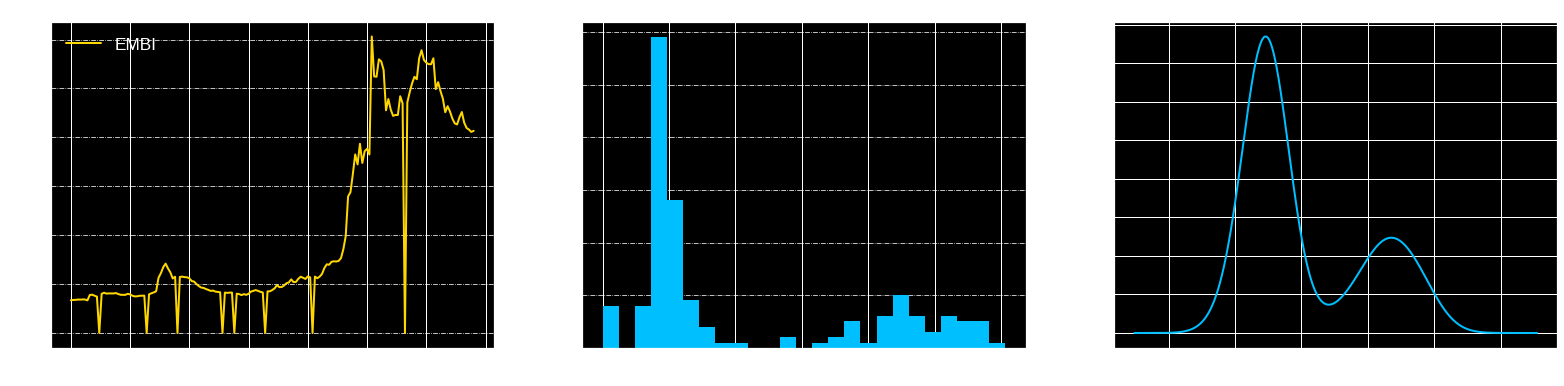

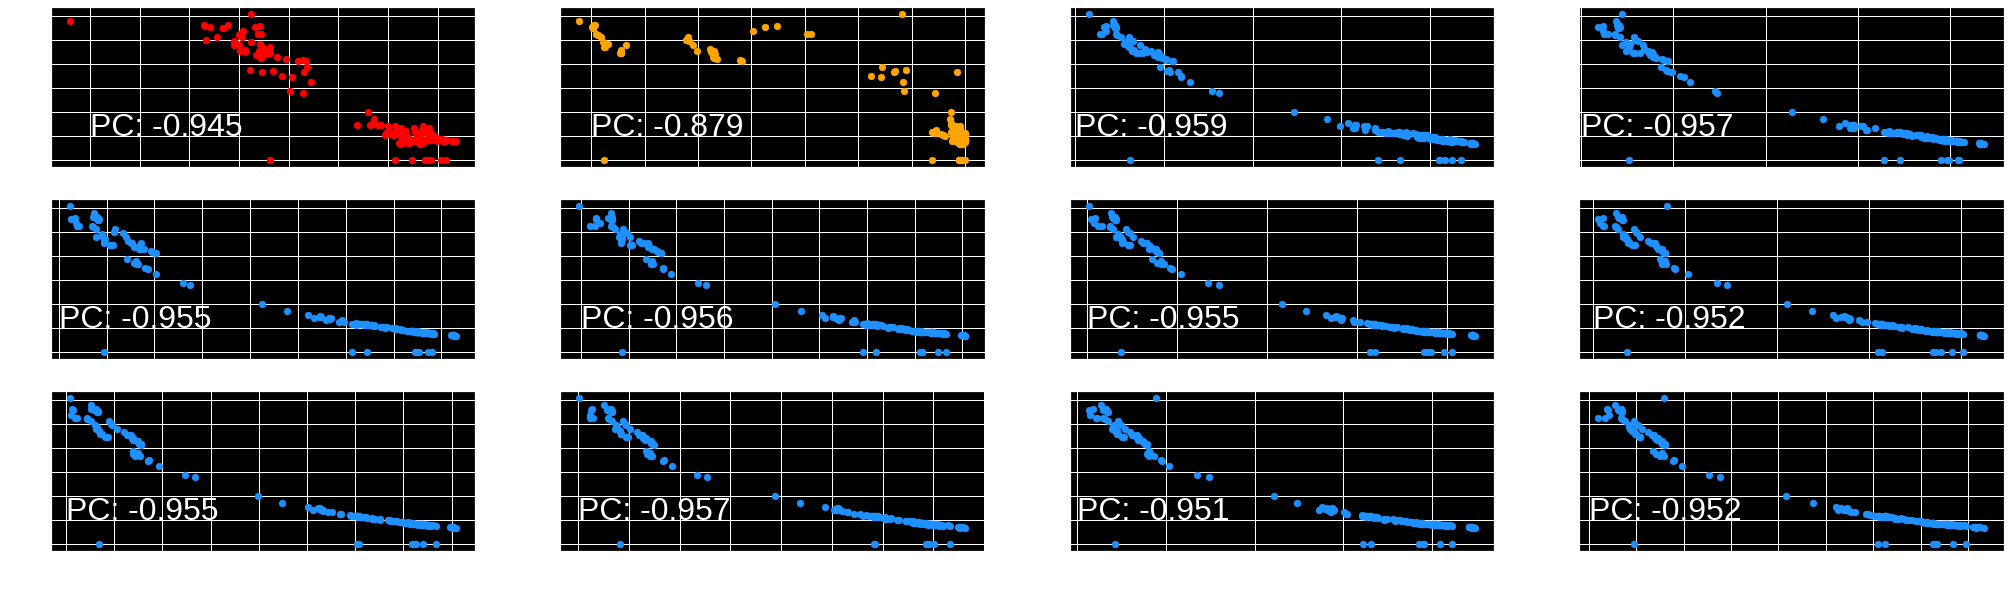

In [12]:
X=data3.iloc[:,2:].values
np.any(np.isnan(X))
np.all(np.isfinite(X))

y=data3.iloc[:,1].values
np.any(np.isnan(y))
np.all(np.isfinite(y))

fecha=data3.iloc[:,0].values
x1=data3.iloc[:,2].values
x2=data3.iloc[:,3].values
x3=data3.iloc[:,4].values
x4=data3.iloc[:,5].values
x5=data3.iloc[:,6].values
x6=data3.iloc[:,7].values
x7=data3.iloc[:,8].values
x8=data3.iloc[:,9].values
x9=data3.iloc[:,10].values
x10=data3.iloc[:,11].values
x11=data3.iloc[:,12].values
x12=data3.iloc[:,13].values

plt.subplots(1,3,figsize=(35,10))

plt.subplot(1,3,1)
data3['EMBI'].plot(figsize=(27, 6), lw=2, color = 'gold')
plt.grid(color='w', ls = '-.', lw = 0.75, axis='y')
plt.ylabel("EMBI")
plt.legend(loc='best', fontsize='xx-large')

plt.subplot(1,3,2)
plt.hist(x=data3["EMBI"],bins=25,color='deepskyblue')
plt.grid(color='w', ls = '-.', lw = 0.75, axis='y')
plt.xlabel("EMBI")
plt.ylabel("Frecuencia")
plt.title('Histograma EMBI')

plt.subplot(1,3,3)
data3["EMBI"].plot(kind='kde',color='deepskyblue', lw=2)


plt.subplots(3,4,figsize=(35,10))

plt.subplot(3,4,1)
plt.scatter(x1,y,color='red')
plt.xlabel('WTI')
plt.ylabel('EMBI')
corr, _ = pearsonr(x1, y)
plt.text(-10, 1000, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,4,2)
plt.scatter(x2,y,color='orange')
plt.xlabel('Bonos PAM')
plt.ylabel('EMBI')
corr, _ = pearsonr(x2, y)
plt.text(30, 1000, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,4,3)
plt.scatter(x3,y,color='dodgerblue')
plt.xlabel('2022')
plt.ylabel('EMBI')
corr, _ = pearsonr(x3, y)
plt.text(20, 1000, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,4,4)
plt.scatter(x4,y,color='dodgerblue')
plt.xlabel('2023')
plt.ylabel('EMBI')
corr, _ = pearsonr(x4, y)
plt.text(20, 1000, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,4,5)
plt.scatter(x5,y,color='dodgerblue')
plt.xlabel('2024')
plt.ylabel('EMBI')
corr, _ = pearsonr(x5, y)
plt.text(20, 1000, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,4,6)
plt.scatter(x6,y,color='dodgerblue')
plt.xlabel('2025')
plt.ylabel('EMBI')
corr, _ = pearsonr(x6, y)
plt.text(20, 1000, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,4,7)
plt.scatter(x7,y,color='dodgerblue')
plt.xlabel('2026')
plt.ylabel('EMBI')
corr, _ = pearsonr(x7, y)
plt.text(20, 1000, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,4,8)
plt.scatter(x8,y,color='dodgerblue')
plt.xlabel('2027(1)')
plt.ylabel('EMBI')
corr, _ = pearsonr(x8, y)
plt.text(20, 1000, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,4,9)
plt.scatter(x9,y,color='dodgerblue')
plt.xlabel('2027(2)')
plt.ylabel('EMBI')
corr, _ = pearsonr(x9, y)
plt.text(20, 1000, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,4,10)
plt.scatter(x10,y,color='dodgerblue')
plt.xlabel('2028')
plt.ylabel('EMBI')
corr, _ = pearsonr(x10, y)
plt.text(20, 1000, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,4,11)
plt.scatter(x11,y,color='dodgerblue')
plt.xlabel('2029')
plt.ylabel('EMBI')
corr, _ = pearsonr(x11, y)
plt.text(20, 1000, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,4,12)
plt.scatter(x12,y,color='dodgerblue')
plt.xlabel('2030')
plt.ylabel('EMBI')
corr, _ = pearsonr(x12, y)
plt.text(20, 1000, 'PC: %.3f' % corr,fontsize=32)

plt.show()

### 2.2 Modelo Regresión Lineal

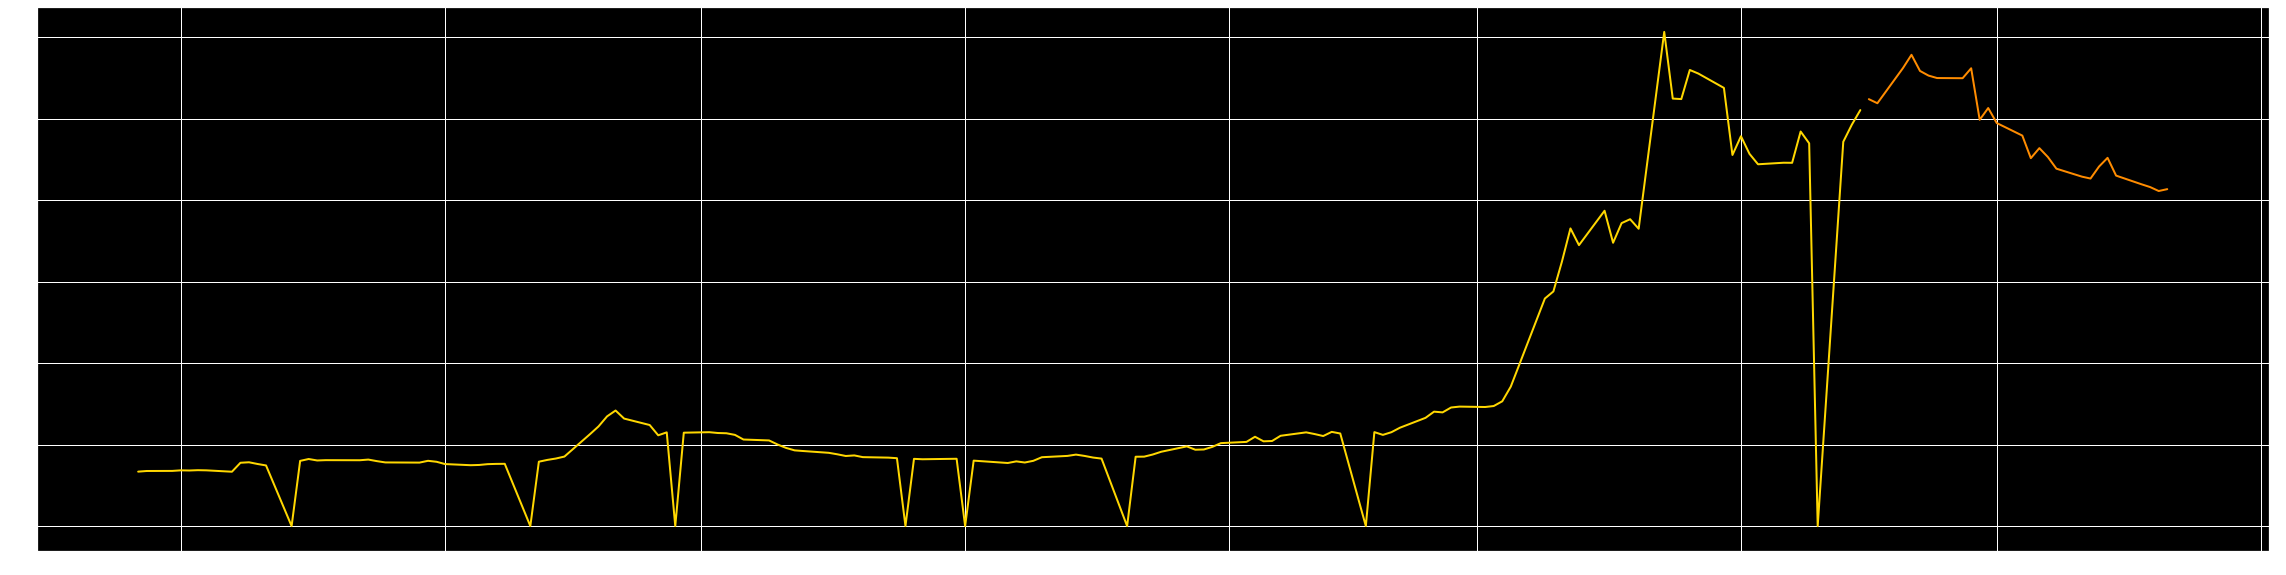

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, shuffle=False)

#train_size = int(len(data3) * 0.8)
#test_size = len(data3) - train_size
#X_train = data3.iloc[0:train_size,2:]
#y_train = data3.iloc[0:train_size,1]
#X_test = data3.iloc[train_size:len(data3),2:]
#y_test = data3.iloc[train_size:len(data3),1]

z = data3.set_index('Fecha')
train2 = z[:int(0.85*(len(z)))]
test2 = z[int(0.85*(len(z))):]

plt.figure(figsize=(40,10))
plt.plot(train2['EMBI'], lw=2, color='gold')
plt.plot(test2['EMBI'], lw=2, color='darkorange')
plt.show()

In [14]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train,X2)
est2 = est.fit()
print('\tResultados Set de Entrenamiento\n',est2.summary())

print('\n*******************************************************************************************************\n')

X2 = sm.add_constant(X_test)
est = sm.OLS(y_test,X2)
est2 = est.fit()
print(est2.summary())

	Resultados Set de Entrenamiento
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     112.3
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           4.40e-63
Time:                        19:35:41   Log-Likelihood:                -1085.7
No. Observations:                 145   AIC:                             2197.
Df Residuals:                     132   BIC:                             2236.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6114.3

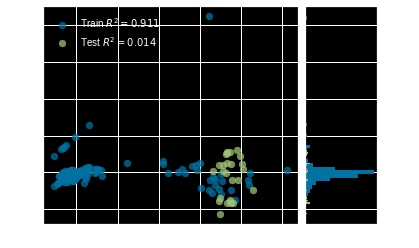

In [15]:
visualizer = ResidualsPlot(lr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.legend()
plt.show()    

Text(0.5, 1.0, 'Prueba: Predicción vs. Real')

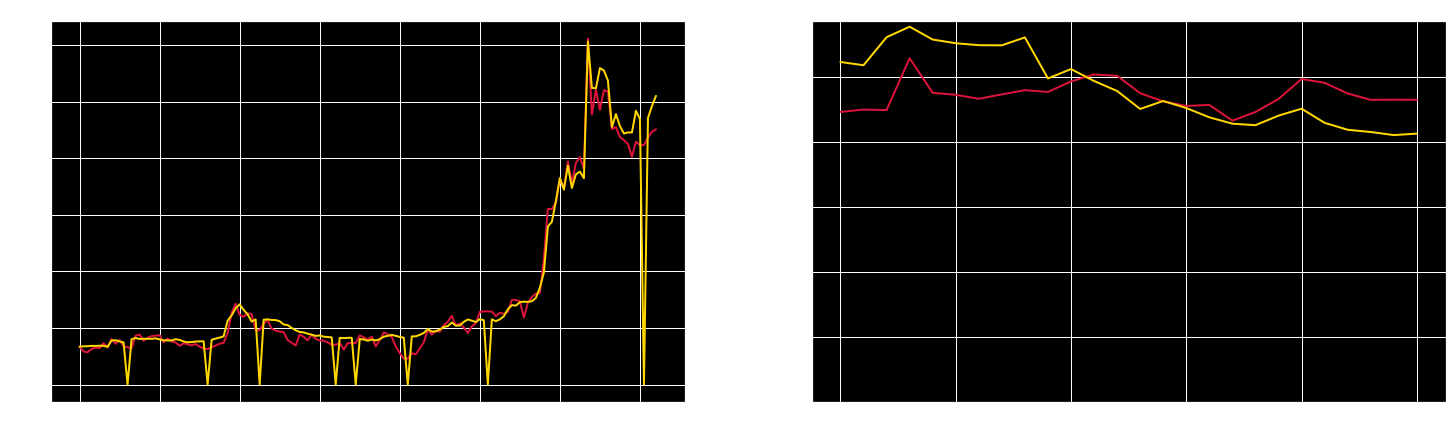

In [16]:
y_predTrain = lr.predict(X_train)
y_predTest = lr.predict(X_test)

plt.subplots(1,2,figsize=(25,7))

plt.subplot(1,2,1)
plt.plot(y_predTrain, lw=2, color='crimson')
plt.plot(y_train,lw=2, color='gold')
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Entrenamiento: Predicción vs. Real')
#plt.legend()

plt.subplot(1,2,2)
plt.plot(y_predTest, lw=2, color='crimson')
plt.plot(y_test,lw=2, color='gold')
plt.ylim(ymin=0)
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Prueba: Predicción vs. Real')
#plt.legend()

### 2.3 Red Neuronal

In [17]:
model = Sequential() 
model.add(Dense(12, input_dim=12, activation= "relu" )) 
model.add(Dense(8, activation= "relu" )) 
model.add(Dense(4, activation= "relu" )) 
model.add(Dense(1))

  # Compile model 
model.compile(loss= "mean_squared_error" , optimizer= "adam") 
  # Fit the model 
history = model.fit(X_train, y_train, epochs=500, batch_size=1, verbose=0)

  # Estimate model performance
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 301271.72 MSE (548.88 RMSE)
Test Score: 9129015.00 MSE (3021.43 RMSE)


Text(0.5, 1.0, 'Prueba: Predicción vs. Real')

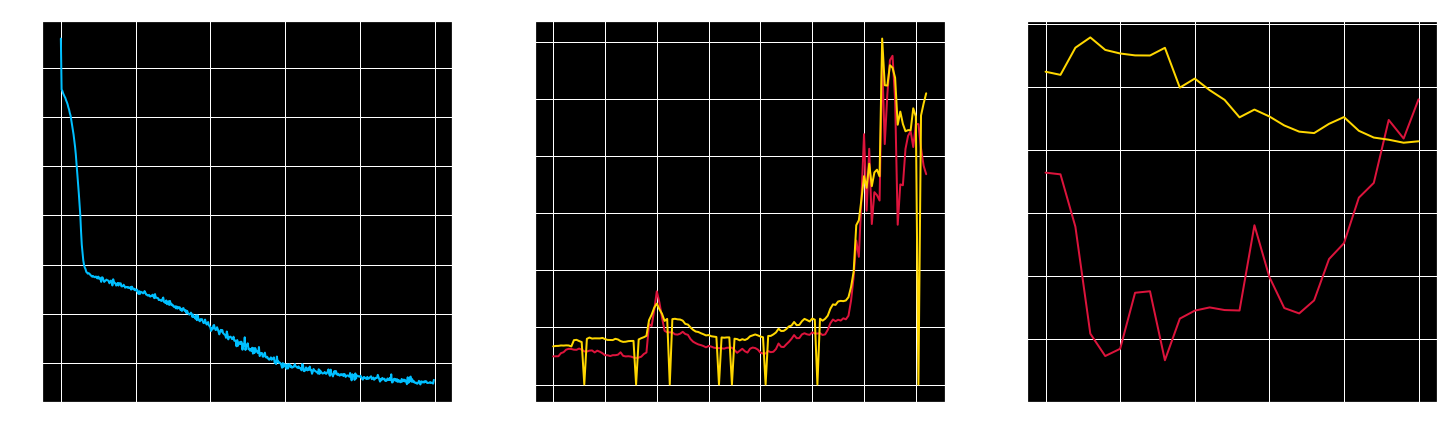

In [18]:
plt.subplots(1,3,figsize=(25,7))

plt.subplot(1,3,1)
plt.plot(history.history['loss'],lw=2, color='deepskyblue')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Epochs')

y_pred = model.predict(X_train)
plt.subplot(1,3,2)
plt.plot(y_pred, lw=2, color='crimson')
plt.plot(y_train,lw=2, color='gold')
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Entrenamiento: Predicción vs. Real')
#plt.legend()

y_pred = model.predict(X_test)
plt.subplot(1,3,3)
plt.plot(y_pred, lw=2, color='crimson')
plt.plot(y_test,lw=2, color='gold')
plt.ylim(ymin=0)
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Prueba: Predicción vs. Real')
#plt.legend()

### 2.4 Resumen - Preprocesamiento




N° | Objetivo | Modelo | Tipo | S/NS | RTrain | RPrueba
--- | --- | --- | --- | --- | --- | ---
1| EMBI | Regrsión Lineal | Serie Temporal | Supervisado |   R2 = 0.90 | R2 = 0.98
2| WMBI | Red Neuronal | Serie Temporal | Supervisado | RMSE = 608.44 | RMSE = 2525.98



---
## 3 Procesamiento de Información
---

### 3.1 Data Fill

In [19]:
data3 = data2.fillna({
                     'EMBI': np.nan,
                     'WTI': np.nan,
                     'PAM': np.nan,
                     '2022': np.nan,
                     '2023': np.nan,
                     '2024': np.nan,
                     '2025': np.nan,
                     '2026': np.nan,
                     '2027(1)': np.nan,
                     '2027(2)': np.nan,
                     '2028': np.nan,
                     '2029': np.nan,
                     '2030': np.nan,
                        })

data3.ffill(axis=0, inplace=True)

data4 = data3.drop(['2024','2027(2)'], axis=1)

data4.set_index('Fecha', inplace=True)

X=data4.iloc[:,2:].values
np.any(np.isnan(X))
np.all(np.isfinite(X))

y=data4.iloc[:,1].values
np.any(np.isnan(y))
np.all(np.isfinite(y))

data4

,EMBI,WTI,PAM,2022,2023,2025,2026,2027(1),2028,2029,2030
Fecha,,,,,,,,,,,
2019-09-26,668.0,56.69,98.997,109.401,106.500,100.555,105.698,104.698,95.321,109.100,101.625
2019-09-27,676.0,56.51,99.071,109.115,106.405,100.275,105.445,104.365,95.020,108.585,101.063
2019-09-30,677.0,56.54,99.052,109.142,106.383,100.010,105.408,104.425,95.167,108.492,101.510
2019-10-01,684.0,54.28,99.059,108.988,106.154,99.770,105.204,104.150,94.929,108.300,101.355
2019-10-02,682.0,54.00,99.051,109.267,106.475,100.183,105.600,104.458,95.538,108.958,102.058
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-15,4300.0,27.64,52.859,39.679,35.704,34.962,33.784,34.052,33.221,33.715,34.369
2020-05-18,4193.0,29.53,53.520,40.634,37.473,35.958,35.242,35.123,34.450,35.070,35.435
2020-05-19,4159.0,32.83,57.860,40.547,38.074,36.081,35.485,35.345,34.570,35.196,35.437


### 3.2 Revisión de Estacionalidad

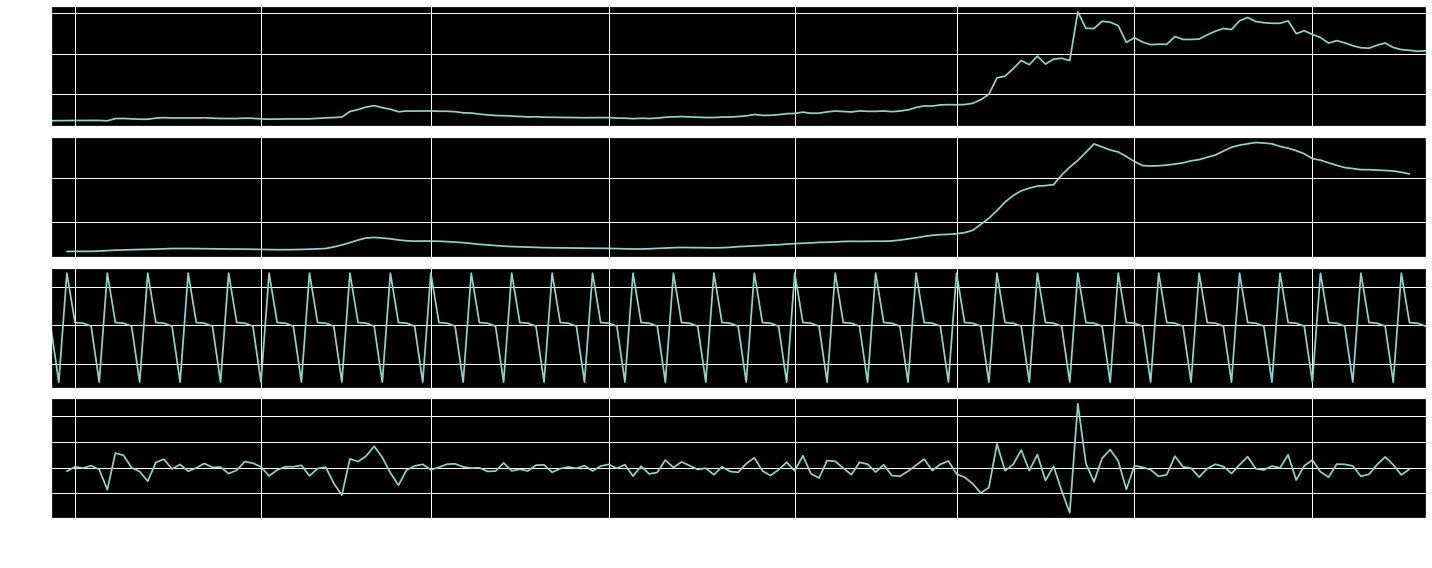

In [41]:
rcParams['figure.figsize'] = 20, 8
decomposition = sm.tsa.seasonal_decompose(data4['EMBI'], model='multiplicative')
fig = decomposition.plot()
plt.show()

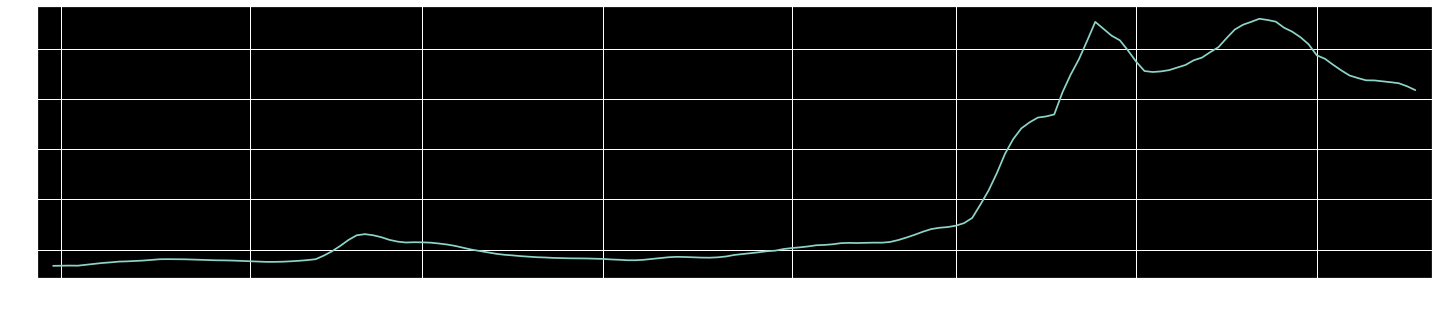

In [21]:
y2 = decomposition.trend
y2.plot(figsize=(25,5))

#### 3.2.1 Regresión Lineal

	Resultados Set de Entrenamiento
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     831.0
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          1.27e-112
Time:                        19:36:50   Log-Likelihood:                -924.68
No. Observations:                 141   AIC:                             1871.
Df Residuals:                     130   BIC:                             1904.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6907.8

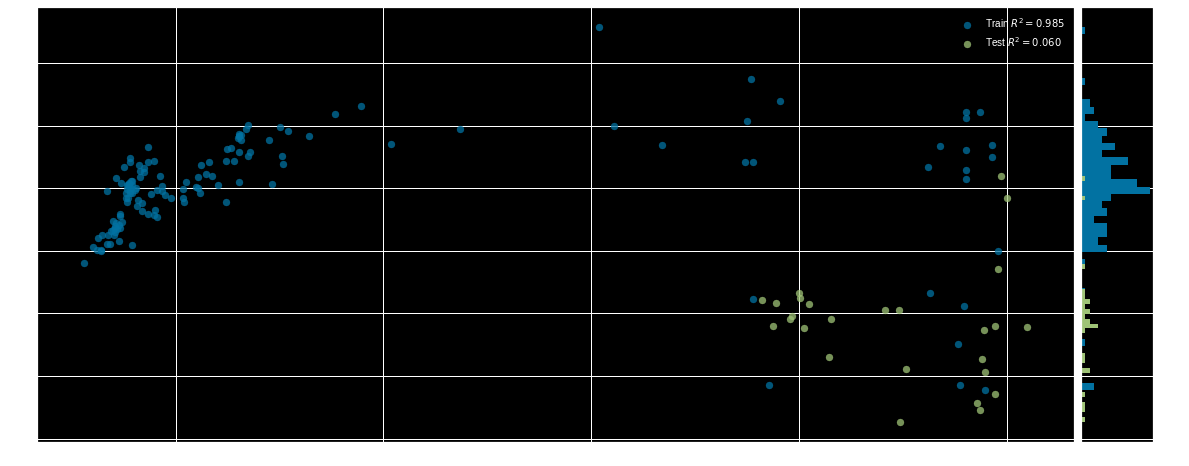

In [22]:
X=data4.iloc[2:-2,1:].values
np.any(np.isnan(X))
np.all(np.isfinite(X))

y=y2.values
y=y[~np.isnan(y)]
np.any(np.isnan(y))
np.all(np.isfinite(y))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, shuffle=False)

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train,X2)
est2 = est.fit()
print('\tResultados Set de Entrenamiento\n',est2.summary())

print('\n*******************************************************************************************************\n')

X2 = sm.add_constant(X_test)
est = sm.OLS(y_test,X2)
est2 = est.fit()
print(est2.summary())

visualizer = ResidualsPlot(lr)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.legend()
plt.show()  

Text(0.5, 1.0, 'Prueba: Predicción vs. Real')

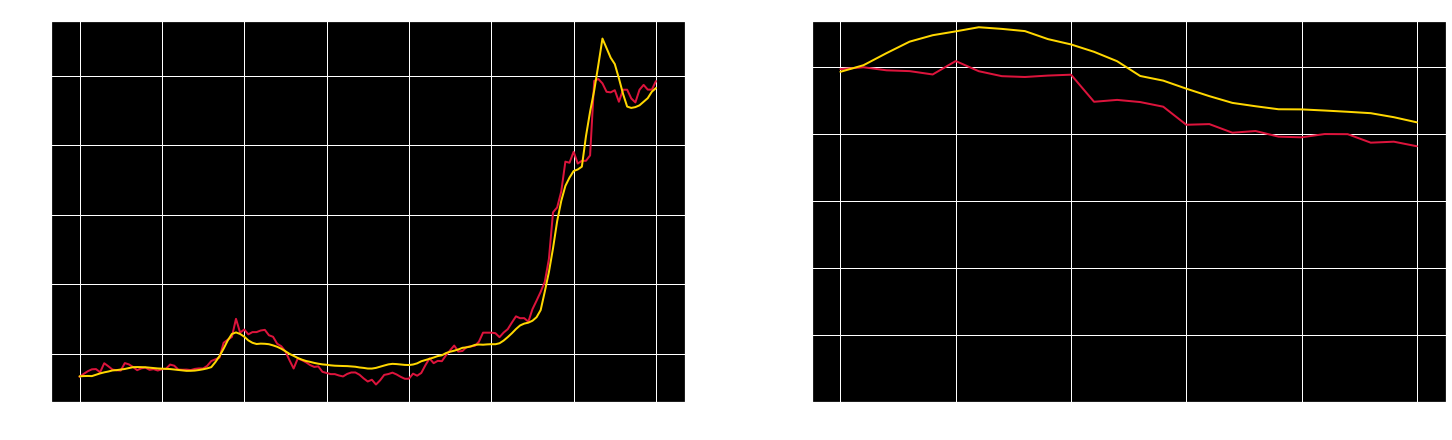

In [23]:
y_predTrain = lr.predict(X_train)
y_predTest = lr.predict(X_test)

plt.subplots(1,2,figsize=(25,7))

plt.subplot(1,2,1)
plt.plot(y_predTrain, lw=2, color='crimson')
plt.plot(y_train,lw=2, color='gold')
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Entrenamiento: Predicción vs. Real')
#plt.legend()

plt.subplot(1,2,2)
plt.plot(y_predTest, lw=2, color='crimson')
plt.plot(y_test,lw=2, color='gold')
plt.ylim(ymin=-0.25)
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Prueba: Predicción vs. Real')
#plt.legend()

#### 3.2.2 Red Neuronal

In [24]:
model = Sequential() 
model.add(Dense(18, input_dim=10, activation= "relu" )) 
model.add(Dense(10, activation= "relu" )) 
model.add(Dense(8, activation= "relu" )) 
model.add(Dense(1))

  # Compile model 
model.compile(loss= "mean_squared_error" , optimizer= "adam") 
  # Fit the model 
history = model.fit(X_train, y_train, epochs=500, batch_size=2, verbose=0)

  # Estimate model performance
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 63979.91 MSE (252.94 RMSE)
Test Score: 4672903.50 MSE (2161.69 RMSE)


Text(0.5, 1.0, 'Prueba: Predicción vs. Real')

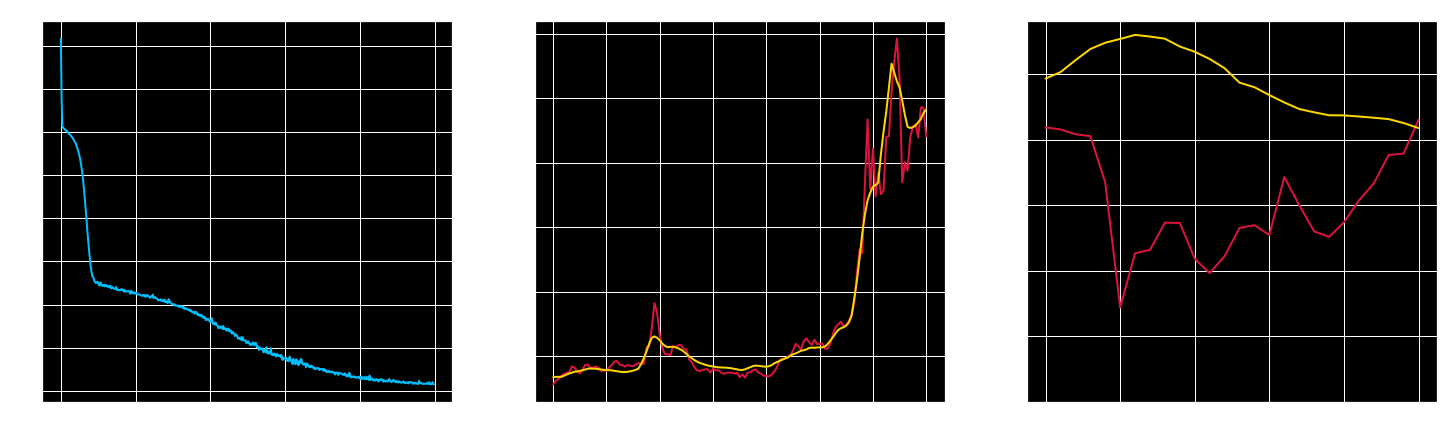

In [25]:
y_predTrain = model.predict(X_train)
y_predTest = model.predict(X_test)

plt.subplots(1,3,figsize=(25,7))

plt.subplot(1,3,1)
plt.plot(history.history['loss'],lw=2, color='deepskyblue')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Epochs')

y_pred = model.predict(X_train)
plt.subplot(1,3,2)
plt.plot(y_predTrain, lw=2, color='crimson')
plt.plot(y_train,lw=2, color='gold')
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Entrenamiento: Predicción vs. Real')
#plt.legend()

y_pred = model.predict(X_test)
plt.subplot(1,3,3)
plt.plot(y_predTest, lw=2, color='crimson')
plt.plot(y_test,lw=2, color='gold')
plt.ylim(ymin=-0.15)
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Prueba: Predicción vs. Real')
#plt.legend()

### 3.3 Escalado

In [26]:
from sklearn import preprocessing 
#NX = preprocessing.scale(X)
Ny = preprocessing.scale(y2)
print(Ny.shape)
fecha = data3['Fecha']
print(data4.shape)

DataScalated = pd.DataFrame(data4)
data5 = DataScalated.rename(columns={0:"WTI",1:"PAM",2:"2022",3:"2023",4:"2025",5:"2026",6:"2027(1)",7:"2028",8:"2029",9:"2030"})
data5 = data5.drop(['EMBI'], axis=1)
data5.insert(0,"EMBI",Ny)
#data5.insert(0,"Fecha",fecha)
#data5.set_index('Fecha', inplace=True)
data5 = data5.dropna()
print(data5.head(10))


(171,)
(171, 11)
                EMBI    WTI     PAM     2022  ...  2027(1)    2028     2029     2030
Fecha                                         ...                                   
2019-09-30 -0.820265  56.54  99.052  109.142  ...  104.425  95.167  108.492  101.510
2019-10-01 -0.818209  54.28  99.059  108.988  ...  104.150  94.929  108.300  101.355
2019-10-02 -0.817295  54.00  99.051  109.267  ...  104.458  95.538  108.958  102.058
2019-10-03 -0.818437  52.47  99.073  109.168  ...  104.192  95.307  108.711  101.908
2019-10-04 -0.807812  52.29  99.086  109.597  ...  104.610  95.800  109.353  102.529
2019-10-07 -0.796272  52.69  99.605  110.017  ...  105.171  96.333  109.733  103.450
2019-10-08 -0.787589  52.81  99.295  103.870  ...   98.758  90.843  102.423   97.176
2019-10-09 -0.780734  52.57  98.450  104.721  ...   99.230  91.707  103.152   98.096
2019-10-10 -0.771936  52.69  98.611  104.566  ...  100.054  92.867  104.126   99.166
2019-10-11 -0.769309  53.88  99.528  104.903  ..

### 3.4 Estacionariedad

In [27]:
from statsmodels.tsa.stattools import adfuller
y = data5.iloc[2:-2,0]

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(y, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -0.572359
p-value                          0.877106
#Lags Used                      10.000000
Number of Observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64


#### 3.4.1 Corrección de Estasionariedad
###Es importante que las series utilizadas sean estacionarias puesto que eso implica que existe una tendencia subyacente que no depende se la simple inercia característica de las series de tiempo. Afortunadamente una serie no estacionaria generalmente lo es en sus primeras diferencias. 

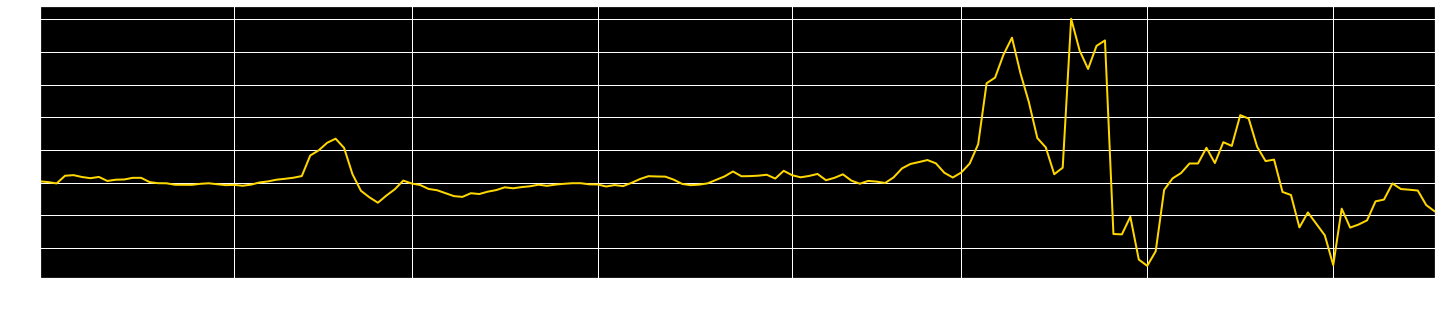

,EMBI,WTI,PAM,2022,2023,2025,2026,2027(1),2028,2029,2030
Fecha,,,,,,,,,,,
2019-10-01,0.002057,-2.26,0.007,-0.154,-0.229,-0.240,-0.204,-0.275,-0.238,-0.192,-0.155
2019-10-02,0.000914,-0.28,-0.008,0.279,0.321,0.413,0.396,0.308,0.609,0.658,0.703
2019-10-03,-0.001143,-1.53,0.022,-0.099,-0.104,-0.208,-0.200,-0.266,-0.231,-0.247,-0.150
2019-10-04,0.010625,-0.18,0.013,0.429,0.299,0.278,0.220,0.418,0.493,0.642,0.621
2019-10-07,0.011539,0.40,0.519,0.420,0.684,0.412,0.526,0.561,0.533,0.380,0.921
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-13,-0.009711,0.81,0.228,-0.602,-0.693,-0.855,-0.992,-0.901,-1.389,-1.000,-1.121
2020-05-14,-0.010740,0.26,-0.275,-0.106,-0.201,-0.135,-0.594,-0.234,-0.041,-0.069,-0.118
2020-05-15,-0.011996,2.08,-0.001,0.862,0.310,0.830,0.406,0.535,0.539,0.281,0.585


In [28]:
dataDiff = data5.diff(axis=0)
dataDiff  = dataDiff .dropna()
dataDiff['EMBI'].plot(figsize = (25,5), lw=2, color='gold')
plt.show()
dataDiff

In [29]:
X=dataDiff.iloc[:,1:].values
np.any(np.isnan(X))
np.all(np.isfinite(X))

y=dataDiff.iloc[:,0].values
np.any(np.isnan(y))
np.all(np.isfinite(y))

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(y, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.900858
p-value                          0.045248
#Lags Used                      14.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64


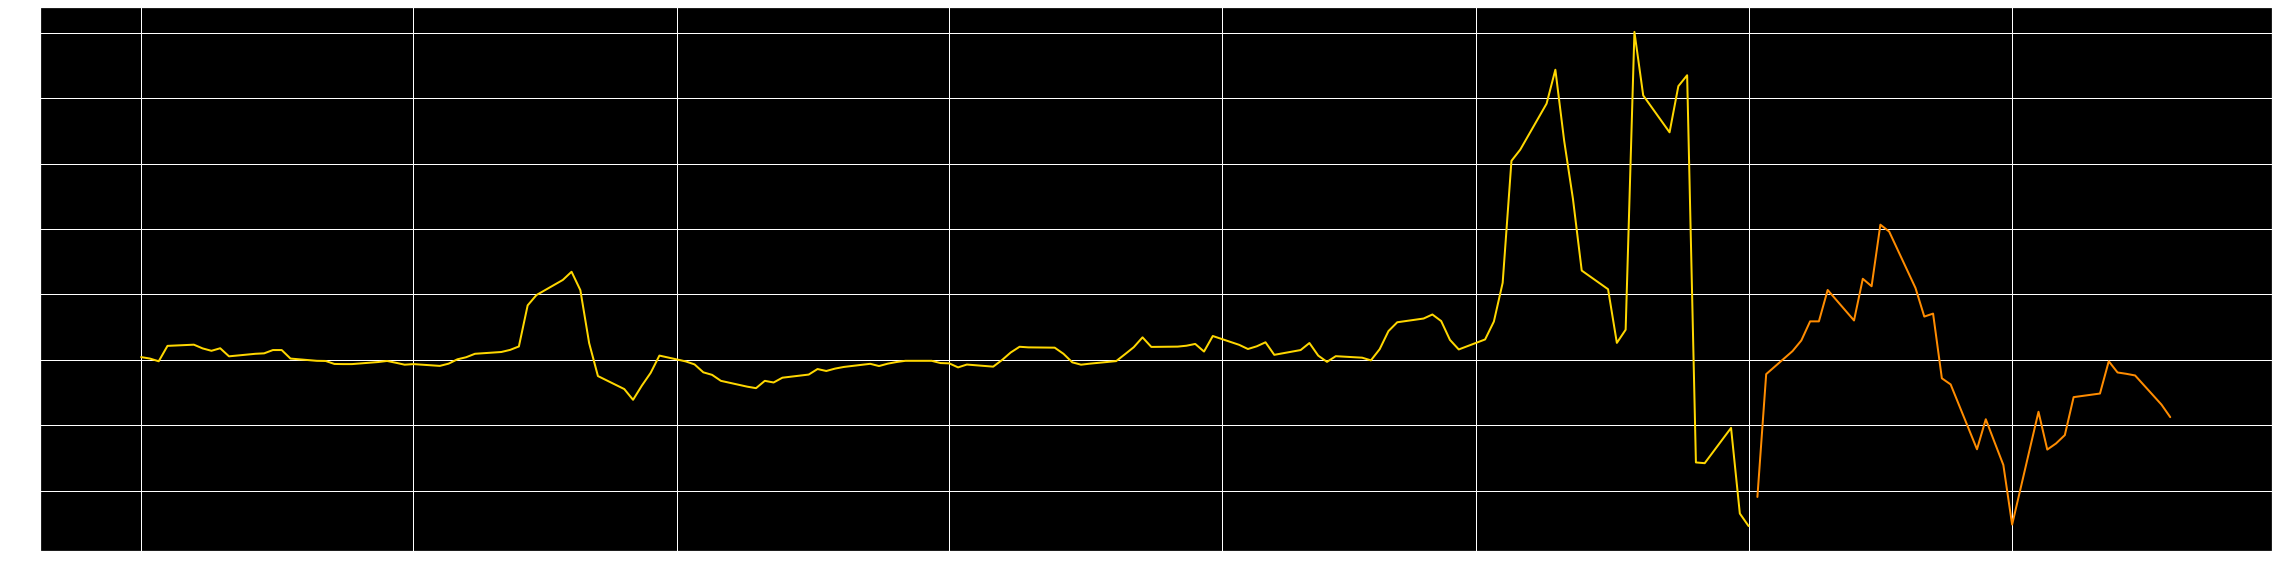

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=False)

z = dataDiff
train2 = z[:int(0.80*(len(z)))]
test2 = z[int(0.80*(len(z))):]

plt.figure(figsize=(40,10))
plt.plot(train2['EMBI'], lw=2, color='gold')
plt.plot(test2['EMBI'], lw=2, color='darkorange')
plt.show()

#### 3.4.3 Modelo de Regresión Lineal 

In [32]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train,X2)
est2 = est.fit()
print('\tResultados Set de Entrenamiento\n',est2.summary())

print('\n*******************************************************************************************************\n')

X2 = sm.add_constant(X_test)
est = sm.OLS(y_test,X2)
est2 = est.fit()
print(est2.summary())

	Resultados Set de Entrenamiento
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     7.186
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           7.98e-09
Time:                        19:37:26   Log-Likelihood:                 218.46
No. Observations:                 132   AIC:                            -414.9
Df Residuals:                     121   BIC:                            -383.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0

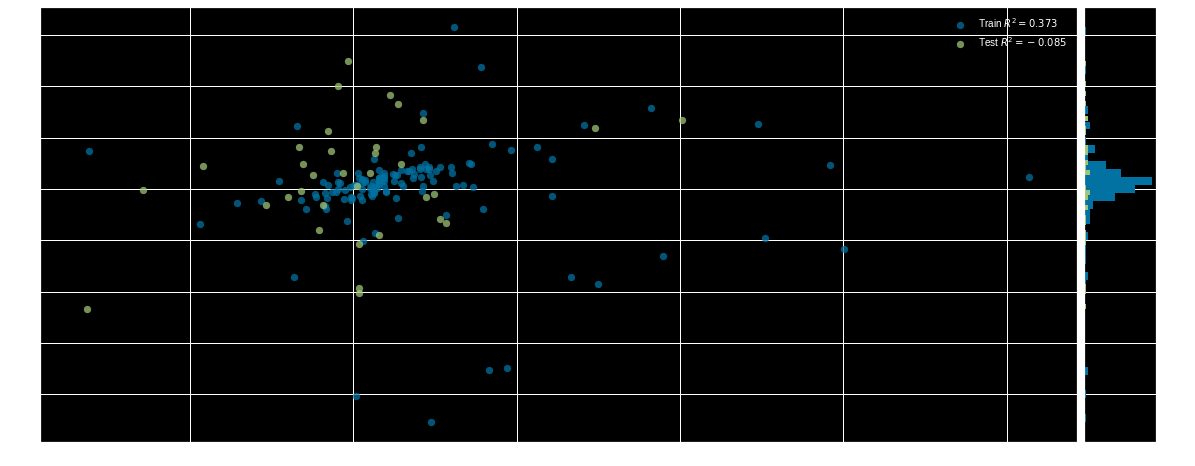

In [33]:
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.legend()
plt.show()  

Text(0.5, 1.0, 'Prueba: Predicción vs. Real')

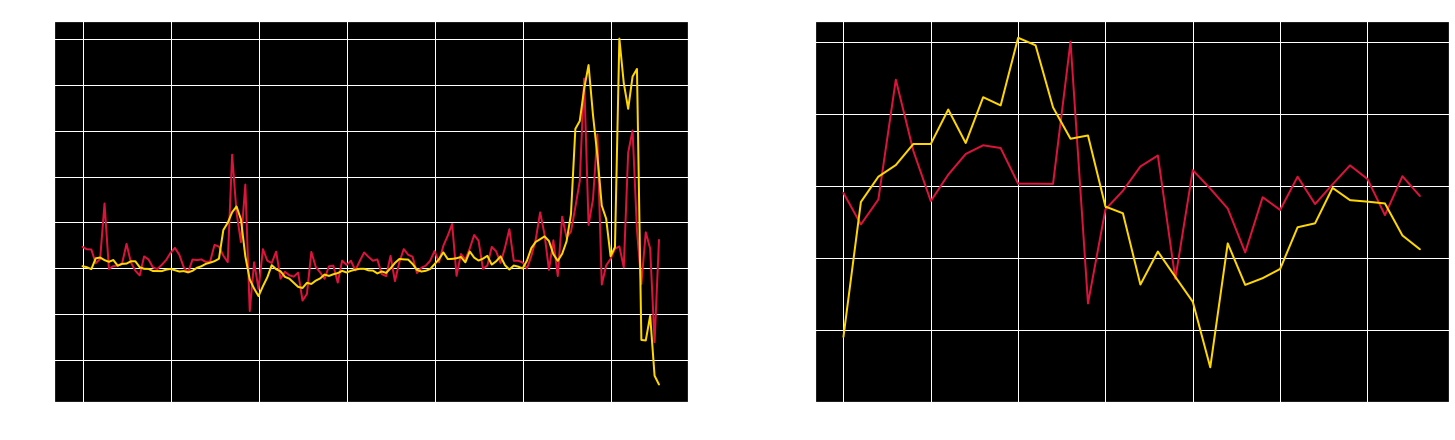

In [34]:
y_predTrain = lr.predict(X_train)
y_predTest = lr.predict(X_test)

plt.subplots(1,2,figsize=(25,7))

plt.subplot(1,2,1)
plt.plot(y_predTrain, lw=2, color='crimson')
plt.plot(y_train,lw=2, color='gold')
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Entrenamiento: Predicción vs. Real')
#plt.legend()

plt.subplot(1,2,2)
plt.plot(y_predTest, lw=2, color='crimson')
plt.plot(y_test,lw=2, color='gold')
plt.ylim(ymin=-0.15)
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Prueba: Predicción vs. Real')
#plt.legend()

#### 3.4.4 Red Neuronal

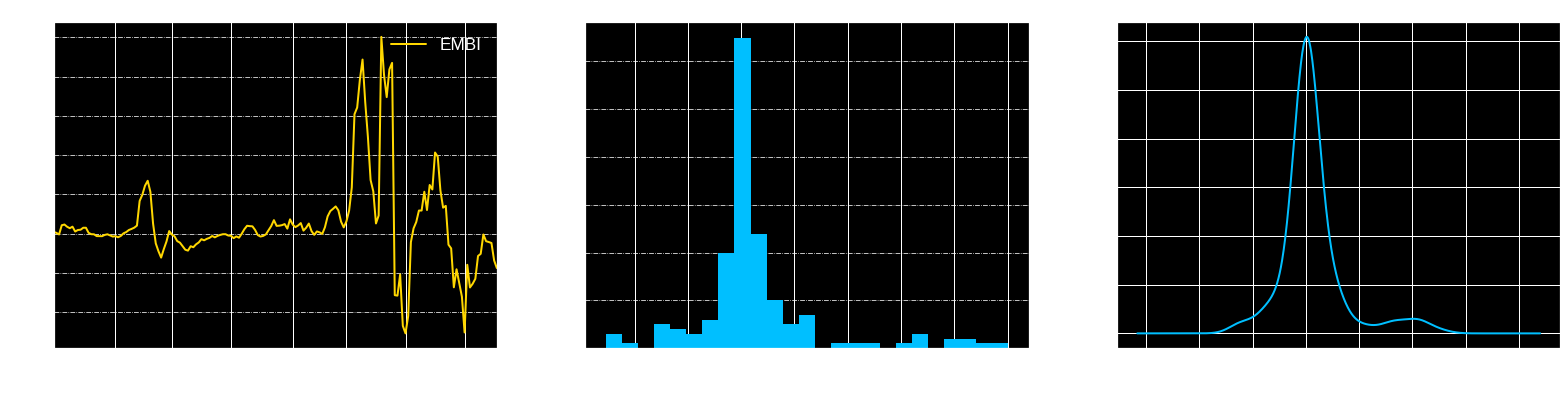

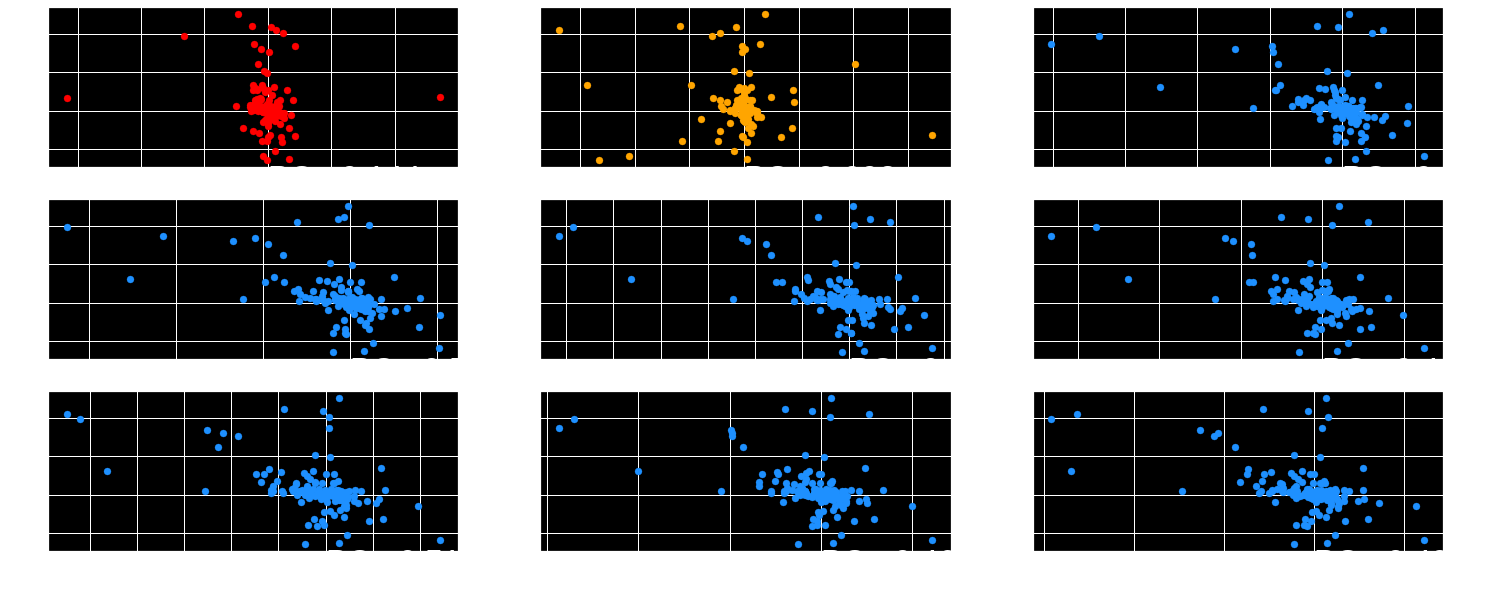

In [35]:
x1=dataDiff.iloc[:,1].values
x1.shape

x2=dataDiff.iloc[:,2].values
x3=dataDiff.iloc[:,3].values
x4=dataDiff.iloc[:,4].values
x5=dataDiff.iloc[:,5].values
x6=dataDiff.iloc[:,6].values
x7=dataDiff.iloc[:,7].values
x8=dataDiff.iloc[:,8].values
x9=dataDiff.iloc[:,9].values
y=dataDiff.iloc[:,0].values

plt.subplots(1,3,figsize=(35,10))

plt.subplot(1,3,1)
dataDiff['EMBI'].plot(figsize=(27, 6), lw=2, color='gold')
plt.grid(color='w', ls = '-.', lw = 0.75, axis='y')
plt.ylabel("EMBI")
plt.legend(loc='best', fontsize='xx-large')

plt.subplot(1,3,2)
plt.hist(x=dataDiff["EMBI"],bins=25, color='deepskyblue')
plt.grid(color='w', ls = '-.', lw = 0.75, axis='y')
plt.xlabel("EMBI")
plt.ylabel("Frecuencia")
plt.title('Histograma EMBI')

plt.subplot(1,3,3)
dataDiff["EMBI"].plot(kind='kde', lw=2, color='deepskyblue')

plt.subplots(3,3,figsize=(25,10))

plt.subplot(3,3,1)
plt.scatter(x1,y,color='red')
plt.xlabel('WTI')
plt.ylabel('EMBI')
corr, _ = pearsonr(x1, y)
plt.text(0, -0.2, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,3,2)
plt.scatter(x2,y,color='orange')
plt.xlabel('PAM')
plt.ylabel('EMBI')
corr, _ = pearsonr(x2, y)
plt.text(0, -0.2, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,3,3)
plt.scatter(x3,y,color='dodgerblue')
plt.xlabel('2022')
plt.ylabel('EMBI')
corr, _ = pearsonr(x3, y)
plt.text(0, -0.2, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,3,4)
plt.scatter(x4,y,color='dodgerblue')
plt.xlabel('2022')
plt.ylabel('EMBI')
corr, _ = pearsonr(x4, y)
plt.text(0, -0.2, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,3,5)
plt.scatter(x5,y,color='dodgerblue')
plt.xlabel('2022')
plt.ylabel('EMBI')
corr, _ = pearsonr(x5, y)
plt.text(0, -0.2, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,3,6)
plt.scatter(x6,y,color='dodgerblue')
plt.xlabel('2022')
plt.ylabel('EMBI')
corr, _ = pearsonr(x6, y)
plt.text(0, -0.2, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,3,7)
plt.scatter(x7,y,color='dodgerblue')
plt.xlabel('2022')
plt.ylabel('EMBI')
corr, _ = pearsonr(x7, y)
plt.text(0, -0.2, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,3,8)
plt.scatter(x8,y,color='dodgerblue')
plt.xlabel('2022')
plt.ylabel('EMBI')
corr, _ = pearsonr(x8, y)
plt.text(0, -0.2, 'PC: %.3f' % corr,fontsize=32)

plt.subplot(3,3,9)
plt.scatter(x9,y,color='dodgerblue')
plt.xlabel('2022')
plt.ylabel('EMBI')
corr, _ = pearsonr(x9, y)
plt.text(0, -0.2, 'PC: %.3f' % corr,fontsize=32)
plt.show

plt.show()

In [36]:
model = Sequential() 
model.add(Dense(10, input_dim=10, activation= "sigmoid" )) 
model.add(Dense(6, activation= "sigmoid" )) 
model.add(Dense(4, activation= "relu" )) 
model.add(Dense(1))

  # Compile model 
model.compile(loss= "mean_squared_error" , optimizer= "adam") 
  # Fit the model 
history = model.fit(X_train, y_train, epochs=500, batch_size=1, verbose=0)

  # Estimate model performance
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.01 RMSE)
Test Score: 0.01 MSE (0.07 RMSE)


Text(0.5, 1.0, 'Prueba: Predicción vs. Real')

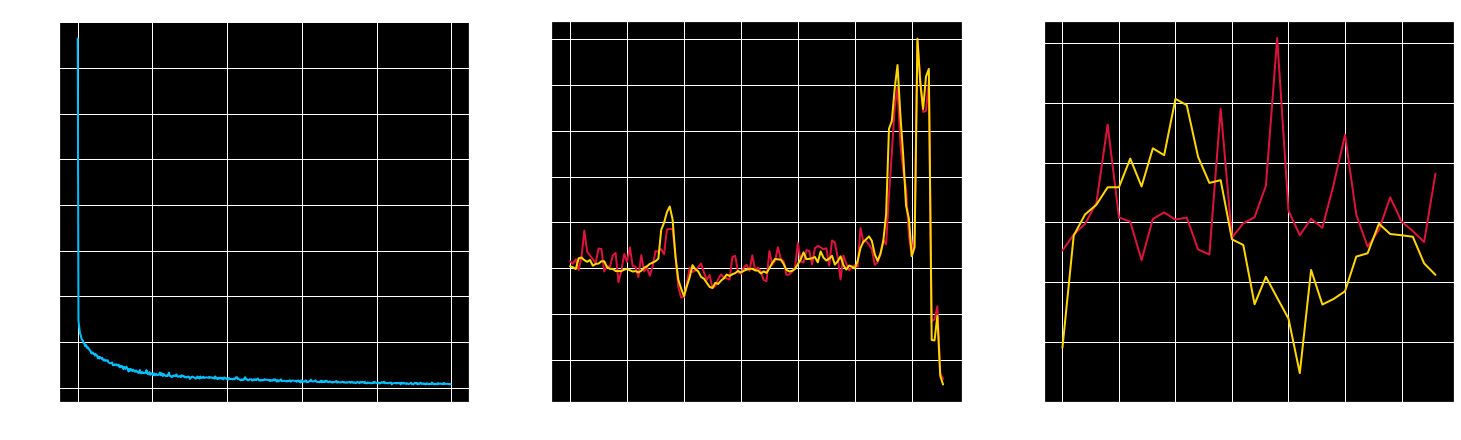

In [37]:
y_predTrain = model.predict(X_train)
y_predTest = model.predict(X_test)

plt.subplots(1,3,figsize=(25,7))

plt.subplot(1,3,1)
plt.plot(history.history['loss'],lw=2, color='deepskyblue')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Epochs')

y_pred = model.predict(X_train)
plt.subplot(1,3,2)
plt.plot(y_predTrain, lw=2, color='crimson')
plt.plot(y_train,lw=2, color='gold')
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Entrenamiento: Predicción vs. Real')
#plt.legend()

y_pred = model.predict(X_test)
plt.subplot(1,3,3)
plt.plot(y_predTest, lw=2, color='crimson')
plt.plot(y_test,lw=2, color='gold')
plt.ylim(ymin=-0.15)
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Prueba: Predicción vs. Real')
#plt.legend()

### 3.5 Resumen

N° | Objetivo | Modelo | Tipo | S/NS | Corección | RTrain | RPrueba
--- | --- | --- | --- | --- | --- | --- | ---
1| EMBI | Regrsión Lineal | Serie Temporal | Supervisado | NA |   R2 = 0.90 | R2 = 0.98
2| WMBI | Red Neuronal | Serie Temporal | Supervisado | NA | RMSE = 608.44 | RMSE = 2525.98
3| EMBI | Regrsión Lineal | Serie Temporal | Supervisado | Estacionalidad y NaN | R2 = 0.98 | R2 = 0.96
|  | Red Neuronal | Serie Temporal | Supervisado | Estacionalidad y NaN | RMSE = 412.39 | RMSE = 1848.32
4| D-EMBI | Regresión Lineal | Serie Temporal | Supervisado | Escalado y Estacionaridad | R2 = 0.32 | R2 = 0.06
| | Red Neuronal | Serie Temporal | Supervisado | Escalado y Estacionaridad | RMSE = 0.02 | RMSE = 0.07

---
## 4. Modelos
---

### 4.1 Regresión Lineal Multiple

Precisión Entrenamiento: 0.9881362740743593
Precisión Prueba:        0.9937141619089034


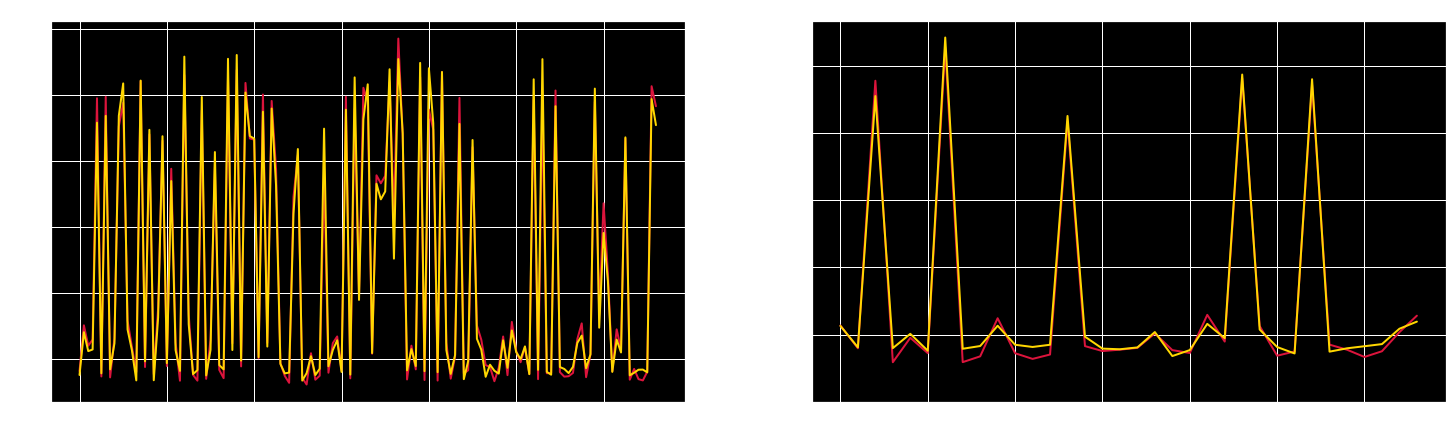

In [38]:
X=data4.iloc[2:-2,1:].values
np.any(np.isnan(X))
np.all(np.isfinite(X))

y=y2.values
y=y[~np.isnan(y)]
np.any(np.isnan(y))
np.all(np.isfinite(y))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=True)

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

print('Precisión Entrenamiento:',lr.score(X_train, y_train))
print('Precisión Prueba:       ',lr.score(X_test, y_test))

y_predTrain = lr.predict(X_train)
y_predTest = lr.predict(X_test)

plt.subplots(1,2,figsize=(25,7))

plt.subplot(1,2,1)
plt.plot(y_predTrain, lw=2, color='crimson')
plt.plot(y_train,lw=2, color='gold')
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Entrenamiento: Predicción vs. Real')
#plt.legend()

plt.subplot(1,2,2)
plt.plot(y_predTest, lw=2, color='crimson')
plt.plot(y_test,lw=2, color='gold')
plt.ylim(ymin=-0.25)
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Prueba: Predicción vs. Real')
#plt.legend()
plt.show()

### 4.2 Red Neuronal


Train Score: 57586.57 MSE (239.97 RMSE)
Test Score: 25743.01 MSE (160.45 RMSE)


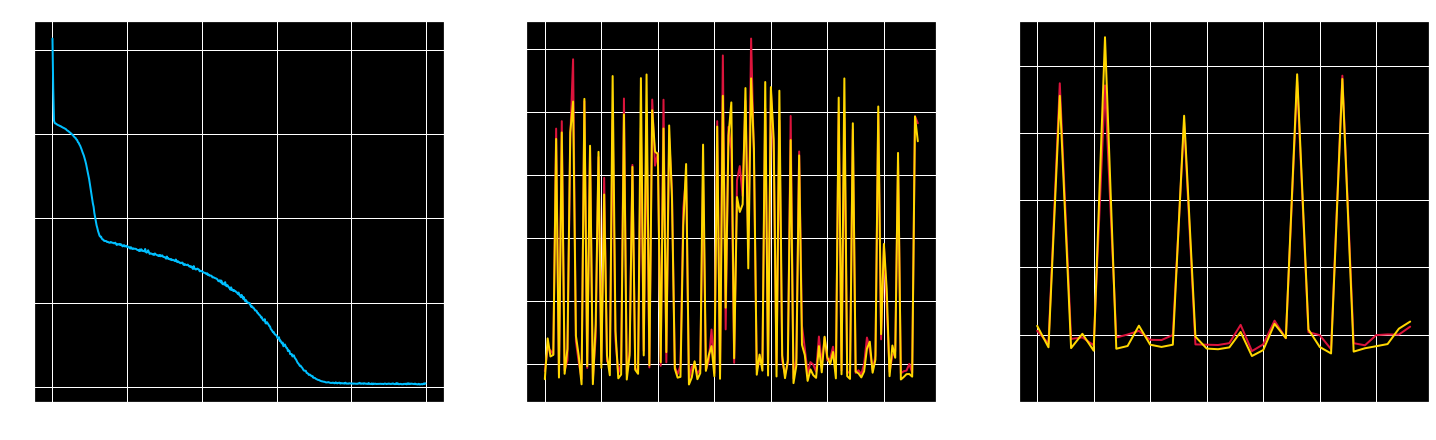

In [39]:
model = Sequential() 
model.add(Dense(10, input_dim=10, activation= "relu" )) 
model.add(Dense(6, activation= "relu" )) 
model.add(Dense(3, activation= "relu" )) 
model.add(Dense(1))

  # Compile model 
model.compile(loss= "mean_squared_error" , optimizer= "adam") 
  # Fit the model 
history = model.fit(X_train, y_train, epochs=500, batch_size=1, verbose=0)

  # Estimate model performance
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

y_predTrain = model.predict(X_train)
y_predTest = model.predict(X_test)

plt.subplots(1,3,figsize=(25,7))

plt.subplot(1,3,1)
plt.plot(history.history['loss'],lw=2, color='deepskyblue')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Epochs')

y_pred = model.predict(X_train)
plt.subplot(1,3,2)
plt.plot(y_predTrain, lw=2, color='crimson')
plt.plot(y_train,lw=2, color='gold')
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Entrenamiento: Predicción vs. Real')
#plt.legend()

y_pred = model.predict(X_test)
plt.subplot(1,3,3)
plt.plot(y_predTest, lw=2, color='crimson')
plt.plot(y_test,lw=2, color='gold')
plt.ylim(ymin=-0.15)
plt.xlabel('Observación')
plt.ylabel('EMBI')
plt.title('Prueba: Predicción vs. Real')
#plt.legend()

plt.show()

### 4.3 Resumen

N° | Objetivo | Modelo | Tipo | S/NS | Corección | RTrain | RPrueba
--- | --- | --- | --- | --- | --- | --- | ---
1| EMBI | Regrsión Lineal | Datos| Supervisado | Estacionalidad y NaN |   R2 = 0.99 | R2 = 0.99
2| WMBI | Red Neuronal | Datos | Supervisado | Estacionalidad y NaN | RMSE = 187.21 | RMSE = 168.69

---
## 5. Conclusiones
---

1.   A pesar de que las series se generan de forma diaria, no corresponden a una serie de tiempo ya que no existe relación de un valor determinado respecto de sus rezagos.
2.   El análisis de series de tiempo se centra en el estudio de las series estacionarias, puesto que eso implica que existe una tendencia subyacente que no depende se la simple inercia característica de las series de tiempo.
3.   No se utilizaron los modelos ARMA y ARIMA ya que al ser modelos autoregresivos utilizan resagos para la predicción en series de tiempo lo cual volvería a resutlar en una baja precisión.